# Derin Öğrenmeye Giriş

1-) Tek Norönlu Model Yapısı:

Merhabalar,
Derin Öğrenmeye Giriş kursu kapsamında tensorflow ve keras kulllanarak derin sinir ağlarını nasıl oluşturduğumuzu adım adım öğreneceğiz.
Makine öğrenmesinin iki temel problemi olan sınıflandırma ve regresyona sinir ağı mimarisini uygulayacağız.
Stokastik gradyan inişi kullanarak sinir ağımızı eğiteceğiz.
Dropout ve batch normalization ve diğer farklı teknikleri kullanarak sinir ağımızın performansını artıracağız.

Basit doğrulasal bir birimi y = wx+b ile temsil ederiz. Burada y tahmin edilen değer, x girdi, w ağırlık ve b ise bias.
Derin öğrenme yaklaşımlarında klasik makine öğrenmesi yaklaşımları gibi w yani ağırlık değerlerini güncelleyerek, verilen örnekleri linear doğruya yakınsamaya çalışırız. 

In [1]:
# Basit doğrusal birimi keras ile koda dökelim.

# keras kütüphanesini import edelim.
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# bir linear birim içeren ağımızı inşa edelim.
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

Şimdi yukarıdaki modelimizi inceleyelim. Modelimize keras'ın Sequential sınıfından bir nesne oluşturarak başladık. Ve bu nesneyi model ismine atadık. Bu modelin içerisinde tek bir nöron olacağı için unit=1 seçtik. Bu tek bir katmanda olacağı için tek Dense ekledik. Diyelim iki iki katmanlı bir model olacak: layers.Dense(units=kaç adet nöron olacağı) şeklinde bir Dense yani katman daha eklememiz gerekecekti.
Peki input_shape olarak belirttiğimiz nedir.
Bu parametre ise modele vericek girdidir. Yani modele 3 adet değişken verilir( y = wx+b deki x değerleri x1,x2,x3 şeklinde ) ve katmanımızda tek unit ( units = 1 ) olduğundan dolayı 1 adet tahmin ya da sınıflandırma beklenir.
Son olarak bu model toplamda 4 adet parametre üzerinde çalışır. ( 3 adet x ve bir adet y değeri )

In [4]:
model.summary() # modelimize bakalım.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


2- ) Derin Sinir Ağları:

Aktivasyon fonksiyonları: y = wx+b denklemindeki y değerini kontrol etmek için yani sinir ağımızdaki nöronun aktif olup olmayacağına karar vermek için kullanılmaktadır. Aktivasyon fonksiyonları derin sinir ağları için önemli bir özelliktir. Aktivasyon fonksiyonları olmadan sinir ağları sadece doğrusal ilişkileri öğrenebilir. Veri uzayındaki verileri kullanarak farklı şekillerde eğriler oluşturabilmemiz için aktivasyon fonksiyonlarına ihtiyacımız vardır.

Giriş katmanımızda 3 farklı değişkenimiz olsun. Gizli katmanda ise 4 nöronlu 1 adet layer'ımız olsun. Giriş katmanındaki 3 değişkenin her biri, gizli katmandaki 4 adet nöronun her birine tam bağlantı yapacak şekilde bağlanır. Bu nöronlar içerisnde aktivasyon fonksiyonlarına tabi tutulur. Diyelim ki bir layer daha ekledik. Bu layer da 3 adet nöron var. İlk layerdaki nöronlardan gelen çıktılar aynı şekilde ikinci layerdaki norönlara tam bağlantı yapacak şekilde bağlanır. İlk layerdaki aktivasyon fonksiyonun aynısı kullılacağı gibi farklı bir aktivasyon fonksiyonu da kullanılabilir.

Şuana kadar elimizde ne var özetleyelim.
    . 3 adet değişkenimiz var.
    . Bu 3 adet değişkenimiz ilk layer'ımızdaki ( layers.Dense(units = 4 ,aktivasyon fonksiyonu, input_shape [3] ) 4 adet nörona tam bağlantılı şekilde bağlanır. Bu nöronlar çıkış verebilmek adına içinde aktivasyon fonksiyonunu tutar.
    . İlk gizli katmanımızdan (layer 1) elde edilen çıkışlar ikinci layer'ımıza gelir ( layers.Dense(units = 3, aktivasyon fonk. ) Dikkat edilirse bu sefer input_shape'miz 4 oldu. Çünkü ilk layerımızdan 4 adet çıkış elde ettik. Bu çıkışlar ikinci layerımız için giriş oldu.
    . İkinci layer'ımızdan gelen 3 adet çıkış ise Çıktı Katmanına verilecek. Çıktı katmanını regresyon ( bazı rastgele sayısal değerlerin tahmini ) görevlerinde aktivasyon fonksiyonu kullanmaz. Diğer görevlerde ( sınıflandırma ) çıktıda bir aktivasyon ( etkinleştirme ) işlevi gerekebilir.( layers.Dense(units = 1 ) )

In [2]:
# modelin inşası

# ilgili kütüphanelerin yüklenmesi
from tensorflow import keras
from tensorflow.keras import layers


In [4]:
# modelin oluşturulması
model = keras.Sequential([
    layers.Dense(units=4, activation='relu',input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    layers.Dense(units=1),
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


3-) Stochastic Gradient Descent

İlk iki bölümde tam bağlantılı katmanların nasıl inşa edileceğini öğrendik. Ancak buradaki ağırlık değerleri (w) rastgele atandı. Bu ağırlıkları olabildiğince en iyi hale getirmek bizim amacımız. İşte buna öğrenme diyoruz. 
Bir ağı eğitmek verilen özellikleri hedefe dönüştürebilecek şekile getirebilmemiz için ağırlıkları en iyi şekilde ayarlamaktan geçer.
Verilen veri ile hedef arasındaki ilişkiyi ağırlıkların en iyi şekilde temsil etmesi gerekir. 
Ağı eğitmemiz için eğitim verilerine ek olarak 2 şeye daha ihtiyacımız var. Bunlar kayıp fonksiyonu ( loss function - ağın tahminlerinin ne kadar iyi olduğunu ölçer ) ve iyileştirici ( optimizer - ağa ağırlıkların nasıl değiştirileceğini söyler )'dir.

3.1-) Kayıp fonksiyonu: 

3.1-) Kayıp fonksiyonu hedefin gerçek değeri ile modelin ön gördüğü değer arasındaki eşitsizliği ölçer. Farklı problemler farklı kayıp fonksiyonu gerektirir. Örneğin regresyon problemlerindeki kayıp fonksiyonu Ortalama Mutlak Hata - mean absolute error- MAE'dir. Her y_pred ( tahmin edilen ) için y_true ( olması gereken çıktı ) MAE = | abs ( y_true, y_pred ) | ile ölçer.

Regresyon problemleri için görebileceğimiz farklı loss fonksiyonları MSE (mean-squared error - ortalama kare hatası) ve HUBER loss'dur. Bu kayıp fonksiyonların tamamı keras da mevcuttur.

Kayıp fonksiyonun değeri ne kadar düşerse eğitim o kadar başarılıdır diyeceğiz.. şimdilik :)

3.2-) Optimizer:

Optimizer kaybı en aza indirmek için ağırlıkları ayarlayan bir algoritmadır.
Derin öğrenmede kullanılan optimizasyon algoritmalarının neredeyse tamamı stokastik gradyan iniş adı verilen bir aileye aittir.Bunlar bir ağı adım adım eğiten yinelemeli algoritmalardır.

* Eğitim Nasıl Gerçekleşiyor?

Eğitim'in bir adımı ( epoch ) şu şekilde ilerler:

1- Eğitim verilerini tahminde bulunmak adına sinir ağımız üzerinde çalıştırırız.

2-Tahminler ve gerçek değerler arasındaki kaybı ölçeriz.

3-Ağırlıkları kaybı daha az olacak şekilde güncelleriz.

Son olarak kayıp istediğimiz kadar küçük olana kadar ya da daha fazla azalmayana kadar bu işlemleri tekrar tekrar yaparız.

Her yenilemenin eğitim verisi örneğine mini batch ( genellikle batch de denir ) adı verilerken elimizdeki bütün eğitim verilerinin tamamını bir kez kullanmaya 1 epoch (epoch) denir.

Learning Rate ve Batch Size : Learning Rate ( öğrenme hızı ) modelin ne kadar hızlı öğrenmesi gerektiğidir. Önemli bir parametredir.Daha küçük öğrenme hızı ağın ağırlıklarının en iyi değerlerine yaklaşmadan önce daha fazla mini batch görmesi gerektiği anlamına gelir. Öğrenme hızı ve mini batch'lerin büyüklüğü SGD eğitiminin nasıl ilerlediği üzerinde en büyük etkiye sahip olan iki parametredir. Aralarındaki ilişki çok incedir. Bu parametreler için doğru seçim her zaman net değildir.( hiperparametreler ) En kullanışlı lr algoritması ADAM'dır.Adam, herhangi bir parametre ayarlaması olmadan çoğu problem için uygun hale getiren uyarlanabilir bir öğrenme hızına sahip bir SGD algoritmasıdır (bir anlamda "kendi kendini ayarlama" dır). Adam harika bir genel amaçlı optimizerdır.

In [7]:
# modelimize loss function ve optimizer'ın eklenmesi

model.compile(
    optimizer="adam",
    loss="mae",
)

Loss ve optimizer'ı bir dizeyle belirttik. Bunlara doğrudan Keras API ile de erişebiliriz.( parametreleri ayarlamak istiyorsak ) Ancak biz şimdilik varsayılan neyse o şekilde kullanalım.

# Uygulama

Artık derin öğrenme modellerini eğitmek için ihtiyacımız olan herşeyi biliyoruz. Kırmızı şarap kalitesi ile ilgili bir veri seti kullanacağız.Bu veri seti yaklaşık 1600 Portekiz kırmızı şarabının fizikokimyasal ölçümlerinden oluşmaktadır. Ayrıca, kör tat testlerinden elde edilen her şarap için bir kalite derecesi de dahildir. Bir şarabın algılanan kalitesini bu ölçümlerden ne kadar iyi tahmin edebiliriz?

İlk olarak veri ön işlemlerini yapacağız. Bundan dolayı her bir özelliği 0-1 arasında olacak şekilde yeniden ölçeklendireceğiz. Nedeni ise sinir ağları girdileri ortak bir ölçekte olduğunda en iyi performans gösterme eğilimindedir.


In [9]:
# ilgili kütüphanelerin yüklenmesi

import pandas as pd
from IPython.display import display


In [10]:
# veri setimizin yüklenmesi

red_wine = pd.read_csv("red-wine.csv")

In [11]:
# verimizi eğitim ve doğrulama şeklinde ayıralım.

df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [12]:
# verimizi 0-1 aralığında ölçeklendirelim.

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [13]:
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

Peki ağımızın kaç girişi olmalı ?  Bunu veri setimize bakarak söyleyebiliriz. Hedefimiz kaliteyi tahmin etmek.

In [14]:
print(X_train.shape) # 1119 adet ve kalite haricinde 11 sutun. buradan da anlaşıldığı üzere input_shape=11 olmalı.

(1119, 11)


1500 den fazla nörona sahip 3 katmanlı bir ağ oluşturacağız.

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               6144      
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 1)                 513       
                                                                 
Total params: 531,969
Trainable params: 531,969
Non-trainable params: 0
_________________________________________________________________


Modelimize loss ve optimizer'ı ekleyelim.

In [17]:
model.compile(
    optimizer='adam',
    loss='mae',
)

Artık eğitime hazırız. Model eğitimi fit() fonksiyonu ile yapılır. Keras optimizer'a bir seferde 256 satırlık veri almasını ve ve bunu bütün veri kümesini 10 kez kullanması gerektiği bilgisini veriyoruz.

In [18]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 49ms/step - loss: 0.3059 - val_loss: 0.1497
Epoch 2/10
5/5 [==============================] - 0s 18ms/step - loss: 0.1514 - val_loss: 0.1378
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 0.1294 - val_loss: 0.1237
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 0.1178 - val_loss: 0.1154
Epoch 5/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1127 - val_loss: 0.1066
Epoch 6/10
5/5 [==============================] - 0s 23ms/step - loss: 0.1105 - val_loss: 0.1026
Epoch 7/10
5/5 [==============================] - 0s 22ms/step - loss: 0.1066 - val_loss: 0.1064
Epoch 8/10
5/5 [==============================] - 0s 22ms/step - loss: 0.1041 - val_loss: 0.1019
Epoch 9/10
5/5 [==============================] - 0s 19ms/step - loss: 0.1026 - val_loss: 0.1013
Epoch 10/10
5/5 [==============================] - 0s 19ms/step - loss: 0.1017 - val_loss: 0.1048


Modelimizin eğitim süreci tamamlandı. Bu değerleri inceleyelim. loss:0.3059 'dan loss: 0.1017' ye düştü. Sonuçlarımızı görselleştirelim.


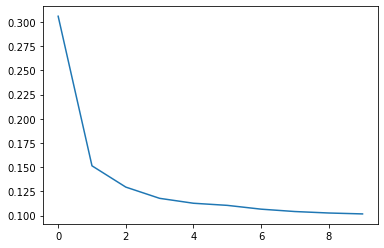

In [19]:
import pandas as pd

# eğitim geçmişini (loss değerlerini) pandas dataframe'ine çevirelim.
history_df = pd.DataFrame(history.history)
# görselleştirelim.
history_df['loss'].plot();

Her epoch'da kayıp değerinin azaldığını gözlemliyoruz. Loss eğrisi bu şekilde yatay hale geldiğinde modelin eğitimi tamamladığı ve diğer epochlar için fazla bir öğrenme gerçekleşmeyeceği anlamına gelir.

4-) Overfitting ve Underfitting 

Eğitim verilerindeki bilgileri iki farklı türde düşünebiliriz. Signal ve Noise. Sinyal genelleştirilen kısımdır. Modelimizin yeni verilerden tahminlerde bulunmasına yardımcı olabilecek kısımdır. Gürültü ise yalnızca eğitim verileri için geçerli olan kısımdır. Modelin tahmin yapmasına gerçekten yardımcı olamayan kalıpların tamamıdır. Eğitim kaybı model ya sinyali öğrendiğinde ya da gürültüyü öğrendiğinde azalacaktır.Ancak doğrulama kaybı modeli sinyali öğrendiğinde azalacaktır. Yani modelin eğitim setinden öğrendiği gürültü ne olursa olsun, yeni verilere genelleyemeyecektir. Böylece model sinyali öğrendiğinde her iki eğride aşağı düşer ancak model gürülyütü öğrendiğinde eğriler arasında boşluk meydana gelmeye başlar.Boşluğun boyutu modelin ne kadar gürültü öğrendiğidir.

En ideal model tüm sinyali öğrenen ancak hiçbir gürültüyü öğrenmeyen modeller inşa etmek. Ancak bu neredeyse imkansız olacak. Bunun yerine modelin daha fazla gürültü öğrenmesi pahasına daha fazla sinyal öğrenmesini sağlayabiliriz.


Bu ticaret iki farklı sorunu ortaya çıkartıyor. Underfitting modelin yeterince sinyal öğrenmemesi nedeni ile kaybın yeteri kadar düşük olmadığı zamandır.Overfitting ise modelin çok fazla gürültü öğrendiği için kaybın olabildiğince düşük olmadı zamandır.Derin öğrenme modellerinin püf noktası ikisi arasındaki en iyi dengeyi bulmaktdır.

** Bir modelin kapasitesi öğrenebileceği kalıpların büyüklüğünü ve karmaşıklığını ifade eder.Sinir ağları için bu büyük ölçüde kaç nörona sahip olduğu ve nasıl birbirlerine bağlı oldukları ile belirlenecektir.

*** Mevcut katmanlara daha fazla birim eklenerek ağ daha geniş bir hale getirilebilir. Bu işlem daha doğrusal ilişkileri öğrenmek için daha kolay bir zamana sahiptir. Ağımıza daha daha fazla katman ekleyerek daha derin hale getirebiliriz. Bu işlem ise doğrusal olmayan veriler üzerinde başarılı sonuçlar verebilir. Hangisinin daha iyi olması sadece veri kümesine bağlıdır.

# Uygulama

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

# varsayılan modelimiz.
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[11]),
    layers.Dense(1),
])

# varsayılan modelimize göre daha fazla nörona sahip geniş modelimiz. doğrusal verilerde kullanmak mantıklıdır.
genis = keras.Sequential([
    layers.Dense(32, activation='relu',input_shape=[11]),
    layers.Dense(1),
])

# varsayılan modelimize göre daha fazla katmana sahip derin modelimiz. doğrusal olmayan verilerde kullanmak mantıklıdır.
derin = keras.Sequential([
    layers.Dense(16, activation='relu',input_shape=[11]),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

In [11]:
derin.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                192       
                                                                 
 dense_33 (Dense)            (None, 16)                272       
                                                                 
 dense_34 (Dense)            (None, 1)                 17        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


5-) Early Stopping

Bir model gürültüyü hevesle öğrenirken eğitim sırasında doğrulama kaybının artmaya başlayacağını belirtmiştik. Bunu önlemek için doğrulama kaybı artık azalmıyor gibi göründüğünde eğitimi durdurabiliriz. Eğitimin bu şekilde kesintiye uğramasına erken durdurma denir.

* Doğrulama kaybının tekrar yükselmeye başladığını tespit ettiğimizde ağırlıkları minumumun oluştuğu yere tekrardan sıfırlayabiliriz. Bu modelin gürültüyü öğrenmemeye ve verilere aşırı uymaya devam etmemesini sağlar.
* Eğitimde mantıklı olan epoch sayısını yüksek tutmak ve early stopping eklemektir. Early stopping her epochtan sonra çalışır.

# Uygulama

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # gelişme olarak sayılacak minumum değişiklik miktarı.
    patience=20, # durmadan önce kaç epoch bekleyeceğiz.
    restore_best_weights=True,
)

Keras içerisinden EarlyStopping sınıfını import ettik. Bu sınıftan bir nesne tanımladık . İçerideki parametrelerin açıklaması şu şekildedir. Önceki 20 epoch eğitime bakarım. Doğrulama kaybında en az 0.001 lik bir değişim görmez isem eğitimi durdururum ve bulduğum en iyi modeli ( ağırlıkları ) saklarım.

# BAŞTAN SONA UYGULAMA

In [20]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('red-wine.csv')

# eğitim ve doğrulama verilerinin ayrılması.
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# scaling işlemi.
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# özellik ve görevlerin ayrılması
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [21]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# erken durdurmanın tanımlanması.
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=20, 
    restore_best_weights=True,
)

# modelin tanımlanması.
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

# optimizer ve loss'un tanımı.
model.compile(
    optimizer='adam',
    loss='mae',
)

In [22]:
# modelin özeti.
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 512)               6144      
                                                                 
 dense_40 (Dense)            (None, 512)               262656    
                                                                 
 dense_41 (Dense)            (None, 512)               262656    
                                                                 
 dense_42 (Dense)            (None, 1)                 513       
                                                                 
Total params: 531,969
Trainable params: 531,969
Non-trainable params: 0
_________________________________________________________________


Minimum validation loss: 0.09204108268022537


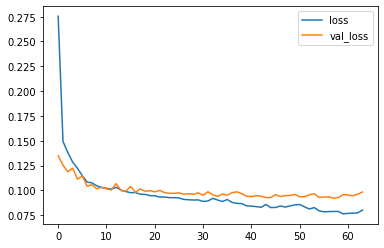

In [23]:
# modelin eğitimi ve değerlendirilmesi.

# modelin eğitimi.
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # early stoppin'i listeye attık.
    verbose=0,  # eğitim log'unu kapat.
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Ve tabii ki, Keras tam 500 epoch'tan çok önce eğitimi durdurdu!

6-) Dropout ve Batch Normalization

Derin öğrenme katmanları sadece birbiri ile bağlantılı yoğun katmanlardan meydana gelmez. Çok çeşitli derin öğrenme katmanları mevcuttur.Bazıları yoğun katmanlar gibidir ve nöronlar arasındaki bağlantıları tanımlar, diğerleri ise başka türden ön işleme veya dönüşümler yapabilir.Bu derste, herhangi bir nöron içermeyen, ancak bazen bir modele çeşitli şekillerde fayda sağlayabilecek bazı işlevler ekleyen iki tür özel katman hakkında bilgi edineceğiz. Her ikisi de modern mimarilerde yaygın olarak kullanılmaktadır.

* Dropout : Overfitting'in düzelmesine yardımcı olabilir. Bir önceki bölümde noise'lerin overfittinge sebep olacağından bahsettik. Bu sahte kalıpları tanımak için ağ genellikle çok özel bir ağırlık kombinasyonuna dayanacaktır. Dropout işlemi eğitimin her adımında rastgele bir katmanın girdi birimlerinin bir kısmını atıyoruz. Bu işlem de ağın eğitim verilerindeki bu sahte kalıpları öğrenmesini zorlaştırıyor. Bu işlem şuna benzer. Tahminler artık büyük bir ağ tarafından değilde daha küçük ağlardan oluşan bir kominite tarafından yapılacaktır. Bu işlem makine öğrenmesindeki random forest yapısına çok benzer. Sonuç olarak majority vote ( çoğunluğun oyu ) sonuca karar verir.

In [24]:
# dropout tanımlaması : 
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # bir sonraki katmananda %30 dropout uygula.
    layers.Dense(16),
    # ...
])

* Batch Normalization : Yavaş ya da dengesiz eğitimi düzeltmeye yarar. Sinir ağlarımızda tüm verilerimizi ortak bir ölçekte (scikit-learn StandardScaler veya MinMaxScaler gibi ) bir şeyle koymak genellikle iyi bir fikirdir. Bunun nedeni, sgd'nin ağ ağırlıklarını verilerin ne kadar büyük bir aktivasyon ürettiğiyle orantılı olarak değiştirmesidir. Çok farklı boyutlarda aktivasyonlar üretme eğiliminde olan özellikler dengesiz eğitim davranışlarına neden olabilir.

* Peki verileri ağa vermeden önce normalleştiriyoruz. Olumlu sonuçlar alıyoruz. Verileri ağ içinde normalleştirmek nasıl olurdu ?  Aslında bu işlem için özel bir katmanımız var. " Batch Normalization " katmanı. Veriler bu katmana geldiğinde katman verileri kendi ortamala ve standart sapmasıyla normalleştirir. Sonrasında verileri iki eğitilebilir yeniden ölçeklendirme parametresiyle yeni bir ölçeğe yerleştirir.

* Çoğu vakit batchnorm optimizasyon sürecisine yardımcı olmak için eklenir.Batchnorm'lu modeller eğitimi tamamlamak için daha az epoch'a ihtiyaç duyma eğilimindedir. Ayrıca batchnorm eğitimin şıkışmasına neden olabilecek bazı sorunları da çözebilir. Eğitim sırasında sorun yaşanıyorsa batchnorm çözüm olabilir. 

In [26]:
# batchnorm-un tanımlanması: hemen hemen her adımda kullanılabilir.

# bir katmandan sonra koyabiliriz..
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),

# yada bir katman ile etkinleştirme işlevi arasında..

layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),

(<keras.layers.core.activation.Activation at 0x1b2a81c05e0>,)

Eğer batchnorm u ağımızın ilk katmanı olarak eklersek Sci-Kit Learn'ün Standardscaler'ı gibi uyarlanabilir önişlemci olarak hareket edebilir.

# BAŞTAN SONA UYGULAMA

In [28]:
# veri görselleştirme
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

# datanın yüklenmesi
import pandas as pd
red_wine = pd.read_csv('red-wine.csv')

# train ve valid. olarak datanın ayrılması.
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# özellik ve görevlerin belirlenmesi.
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [29]:
# dropout'lu modelimizi ekliyoruz.

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

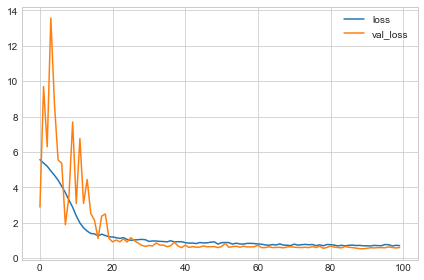

In [30]:
# loss ve optimizer'ı ekleyerek modeli eğitiyoruz.
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# öğrenme eğrisini görselleştirelim.
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

Verilerinizi eğitim için kullanmadan önce standartlaştırırsanız genellikle daha iyi performans elde edersiniz. Bununla birlikte, ham verileri kullanabilmemiz, toplu normalleştirmenin daha zor veri kümelerinde ne kadar etkili olabileceğini göstermektedir.

7-) Binary Classification

Şimdiye kadar sinir ağlarının regresyon problemlerini nasıl çözebileceğini öğrendik. Şimdi sinir ağlarını başka bir yaygın makine öğrenme problemine uygulayacağız: sınıflandırma. Şimdiye kadar öğrendiğimiz her şey hala geçerli. Temel fark, kullandığımız kayıp fonksiyonu ve son katmanın ne tür çıktılar üretmesini istediğimizdir.

İki sınıftan birine sınıflandırma yaygın bir makine öğrenme problemidir. Bir müşterinin bir satın alma işlemi yapıp yapamayacağını, bir kredi kartı işleminin hileli olup olmadığını, derin uzay sinyallerinin yeni bir gezegen kanıtı gösterip göstermediğini tahmin etmek isteyebiliriz. Bunların hepsi ikili sınıflandırma problemleridir.

Ham verilerinizde sınıflar "Evet" ve "Hayır" veya "Köpek" ve "Kedi" gibi dizelerle temsil edilebilir. Bu verileri kullanmadan önce bir sınıf etiketi atayacağız: bir sınıf 0, diğeri 1 olacaktır. Sayısal etiketler atamak, verileri bir sinir ağının kullanabileceği bir forma yerleştirir.

Doğruluk, bir sınıflandırma problemindeki başarıyı ölçmek için kullanılan birçok ölçümden biridir. Doğruluk, doğru tahminlerin toplam tahminlere oranıdır.

Doğrulukla ilgili sorun (ve diğer sınıflandırma metriklerinin çoğu), bir kayıp fonksiyonu olarak kullanılamamasıdır. Sgd'nin sorunsuz bir şekilde değişen bir kayıp fonksiyonuna ihtiyacı vardır, ancak sayımların bir oranı olan doğruluk "sıçramalarda" değişir. O zaman kayıp fonksiyonu olarak çalışacak bir fonksiyon seçmeliyiz.  " cross-entropy " fonksiyonu

Cross-entropy sınıflandırmada olasılıklar arasındaki mesafeyi ölçmeye yarar, cross-entropy bir olasılık dağılımından diğerine olan mesafenin bir ölçüsüdür. ( regressiondaki MAE )

Buradaki fikir, ağımızın olasılık 1.0 ile doğru sınıfı tahmin etmesini istediğimizdir. Tahmin edilen olasılık 1.0'dan ne kadar uzak olursa, Cross-entropy kaybı o kadar büyük olur.

Cross-entropy ve doğruluk fonksiyonlarının her ikisi de girdi olarak olasılıklar gerektirir, yani 0'dan 1'e kadar olan sayılar. Yoğun bir katman tarafından üretilen gerçek değerli çıktıları olasılıklara gizlemek için yeni bir tür aktivasyon fonksiyonu olan sigmoid aktivasyonunu ekliyoruz. Sigmoid uzayda 0-1 arasında bir değer döndürür.

Aktivasyon fonksiyonı olan sigmoid üzerinden gelen sonuca göre son sınıfı tahminini elde etmek için bir eşik olasılığı tanımlarız. Tipik olarak bu 0.5 olacaktır, böylece yuvarlama bize doğru sınıfı verecektir: 0.5'in altında 0 etiketli sınıf ve 0.5 veya üstünde 1 etiketli sınıf anlamına gelir.

# BAŞTAN SONA BİNARY CLASSİFİCATİON

İyonosfer veri seti, Dünya atmosferinin iyonosfer katmanına odaklanan radar sinyallerinden elde edilen özellikleri içerir. Görevimiz, sinyalin bir nesnenin varlığını mı yoksa sadece boş havayı mı gösterdiğini belirlemektir.

In [31]:
import pandas as pd
from IPython.display import display

# datanın yüklenmesi.
ion = pd.read_csv('ion.csv', index_col=0)
display(ion.head())

# veri setinin kopyalanarak tahmin için 1 ve 0 etiketlerinin oluşturulması.
df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

# veri setinin eğitim ve valid. olarak ayrılması.
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

# scaling işleminin yapılması.
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) 
df_valid.dropna(axis=1, inplace=True)

# sınıf tahmini için ayarlama.
X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


Modelimizi regresyon görevleri için yaptığımız gibi tanımlayacağız, ancak bir farkla.Son katmanda bir 'sigmoid' aktivasyonu bulunur, böylece model sınıf olasılıkları üretecektir.

In [34]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]), # tahmin edeceğimiz iki sınıf var. 35 kolondan iki sınıfı attık. 33 kolonu input olarak verdik.
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'), # regression ağlarından farklı olarak olasılıksal bir değer almak için çıkış katmanına sigmoid aktivasyon fn'unu ekledik.
])

In [35]:
# loss ve optimizer'in eklenmesi.
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', # binary sınıflandırma olduğuna dikka etmek gerekir. birden fazla sınıf varsa farklı crossentropy kullanılır.
    metrics=['binary_accuracy'],
)

In [36]:
# modelin eğitimi ve testi.
# bu gibi özel problemler fazla epoch kullanmak ister.biz kolaylık olması adına erken bir early stopping ekledik.

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, 
)

En iyi doğrulama kaybı: 0.2597
En iyi doğruluk oranı: 0.8952


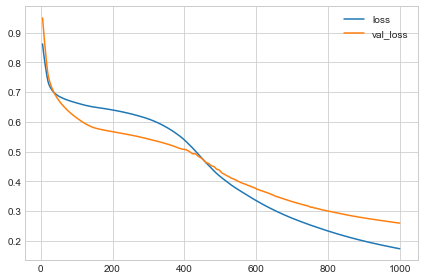

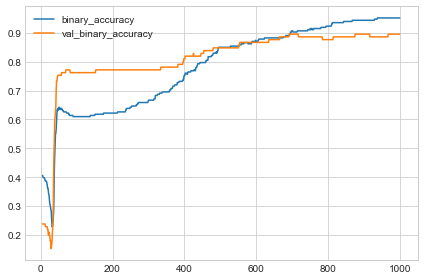

In [38]:
# öğrenme eğrilerini inceleyelim. ayrıca doğrulama setinden elde ettiğimiz loss ve accuracy için en iyi değerleri inceleyeceğiz.
# early stopping ağırlıkları bu değerlere sahip olanlara geri getirecektir.

history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("En iyi doğrulama kaybı: {:0.4f}" +\
      "\nEn iyi doğruluk oranı: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))